In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('train_en.tsv',sep='\t')

In [4]:
data.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [5]:
data.isnull().sum()

id      0
text    0
HS      0
TR      0
AG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

data['HS'].value_counts()

HS
0    5217
1    3783
Name: count, dtype: int64

C:\Users\praga\AppData\Local\Temp\ipykernel_4904\3862735685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['HS'].value_counts() ,y=['Not Hate Speech','Hate Speech'] ,palette='coolwarm')


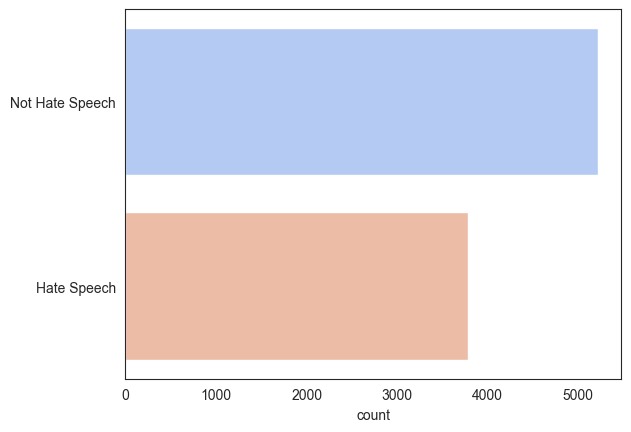

In [27]:
import seaborn as sns
sns.set_style('white')
sns.barplot(x=data['HS'].value_counts() ,y=['Not Hate Speech','Hate Speech'] ,palette='coolwarm')
plt.show()

In [30]:
data['TR'].value_counts()

TR
0    7659
1    1341
Name: count, dtype: int64

C:\Users\praga\AppData\Local\Temp\ipykernel_4904\2017240118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['TR'].value_counts() ,y=['Not Targeted','Targeted'] ,palette='coolwarm')


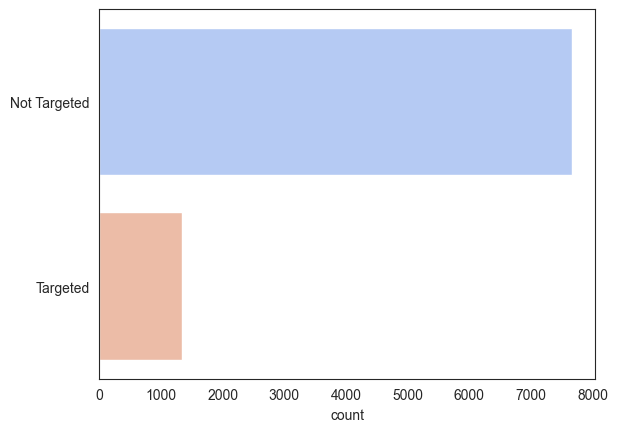

In [29]:
sns.set_style('white')
sns.barplot(x=data['TR'].value_counts() ,y=['Not Targeted','Targeted'] ,palette='coolwarm')
plt.show()

In [35]:
data['AG'].value_counts()

AG
0            7440
1            1559
discredit       1
Name: count, dtype: int64

C:\Users\praga\AppData\Local\Temp\ipykernel_4904\1536167105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['AG'].value_counts() ,y=['Not Agressive','Agressive','Discredit'] ,palette='coolwarm')


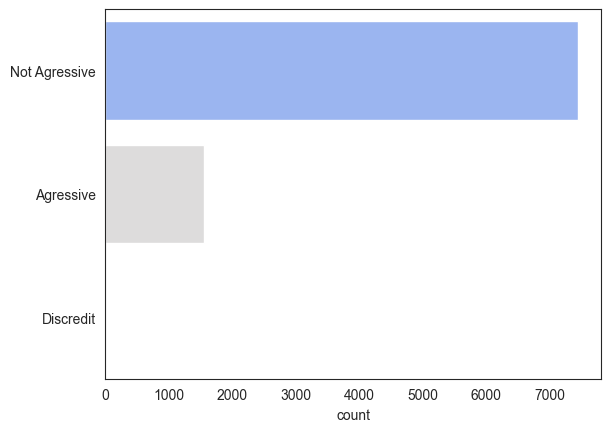

In [36]:
sns.set_style('white')
sns.barplot(x=data['AG'].value_counts() ,y=['Not Agressive','Agressive','Discredit'] ,palette='coolwarm')
plt.show()

In [43]:
data[data['AG']=='discredit']

,id,text,HS,TR,AG
4743,4944,Haven't talked to my kids in days because my b...,1,0,discredit


In [44]:
data.drop(4743,inplace=True)

In [45]:
data[data['AG']=='discredit']

,id,text,HS,TR,AG


In [46]:
import string 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [50]:
def preprocess(text):

    text = text.lower()

    translate_ = str.maketrans('', '', string.punctuation)
    text = text.translate(translate_)


    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    words = word_tokenize(text)

    stop_words = set(stopwords.words('english','spanish'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

  
    lemmatizer = WordNetLemmatizer()
    l=[]
    for word in words:
        l.append(lemmatizer.lemmatize(word))
    text = ' '.join(l)
    return text



In [51]:
data['cleaned'] = data['text'].apply(preprocess)

In [52]:
data

,id,text,HS,TR,AG,cleaned
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0,hurray saving u many way potus realdonaldtrump...
1,202,Why would young fighting age men be the vast m...,1,0,0,would young fighting age men vast majority one...
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0,kamalaharris illegals dump kid border like roa...
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0,ny time nearly white state pose array problem ...
4,205,Orban in Brussels: European leaders are ignori...,0,0,0,orban brussels european leader ignoring people...
...,...,...,...,...,...,...
8995,9196,@mmdwriter @JRubinBlogger @BenSasse I am proud...,0,0,0,mmdwriter jrubinblogger bensasse proud hysteri...
8996,9197,@CheriJacobus Hollywood is complicit in the ra...,0,0,0,cherijacobus hollywood complicit rape sexual a...
8997,9198,@amaziah_filani What a fucking cunt I hate see...,1,1,1,amaziahfilani fucking cunt hate seeing kid get...
8998,9199,Hysterical woman like @CoryBooker,0,0,0,hysterical woman like corybooker


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf = TfidfVectorizer()

In [57]:
X = data['cleaned']
y= data['HS']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X,y)

In [59]:
X_train_ = tfidf.fit_transform(X_train)
X_test_ = tfidf.transform(X_test)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier , HistGradientBoostingClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report , accuracy_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
Gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
sv= SVC()
hg = HistGradientBoostingClassifier()
nb = BernoulliNB()



In [67]:
Gb.fit(X_train_ , y_train)
y_pred = Gb.predict(X_test_)

print(f'accuracy_score: {accuracy_score(y_test , y_pred)}')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))


accuracy_score: 0.744
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1630
           1       0.52      0.79      0.63       620

    accuracy                           0.74      2250
   macro avg       0.71      0.76      0.72      2250
weighted avg       0.80      0.74      0.76      2250

[[1186  132]
 [ 444  488]]


<Axes: >

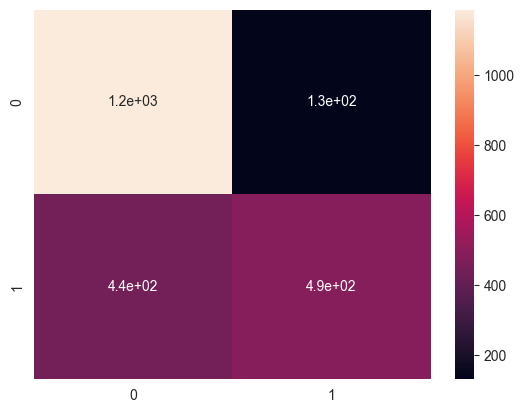

In [74]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 

In [75]:
rf.fit(X_train_ , y_train)
y_pred = rf.predict(X_test_)

print(f'accuracy_score: {accuracy_score(y_test , y_pred)}')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))

accuracy_score: 0.7808888888888889
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1431
           1       0.67      0.77      0.72       819

    accuracy                           0.78      2250
   macro avg       0.77      0.78      0.77      2250
weighted avg       0.79      0.78      0.78      2250

[[1128  190]
 [ 303  629]]


<Axes: >

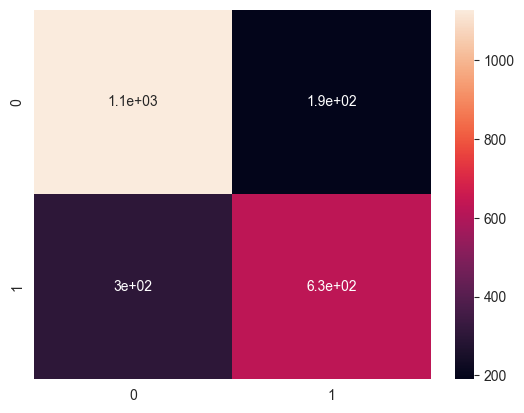

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 

In [77]:
dt.fit(X_train_ , y_train)
y_pred = dt.predict(X_test_)

print(f'accuracy_score: {accuracy_score(y_test , y_pred)}')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))

accuracy_score: 0.7417777777777778
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1361
           1       0.67      0.70      0.68       889

    accuracy                           0.74      2250
   macro avg       0.73      0.73      0.73      2250
weighted avg       0.74      0.74      0.74      2250

[[1049  269]
 [ 312  620]]


<Axes: >

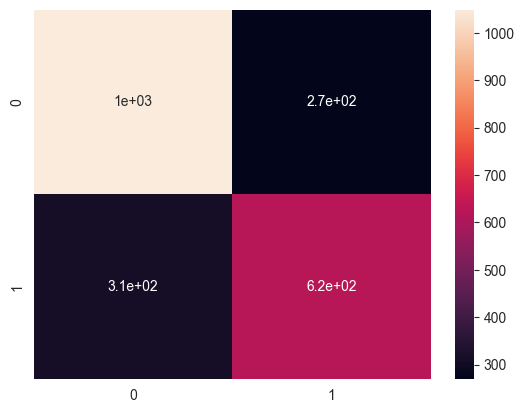

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 

accuracy_score: 0.7773333333333333
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1475
           1       0.65      0.78      0.71       775

    accuracy                           0.78      2250
   macro avg       0.76      0.78      0.76      2250
weighted avg       0.79      0.78      0.78      2250

[[1146  172]
 [ 329  603]]


<Axes: >

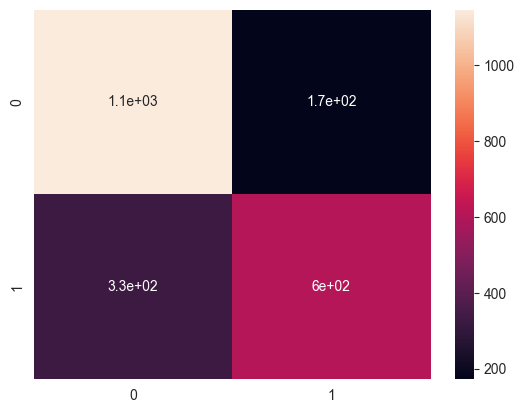

In [79]:
lr.fit(X_train_ , y_train)
y_pred = lr.predict(X_test_)

print(f'accuracy_score: {accuracy_score(y_test , y_pred)}')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 

accuracy_score: 0.7751111111111111
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1492
           1       0.64      0.78      0.70       758

    accuracy                           0.78      2250
   macro avg       0.75      0.78      0.76      2250
weighted avg       0.79      0.78      0.78      2250

[[1152  166]
 [ 340  592]]


<Axes: >

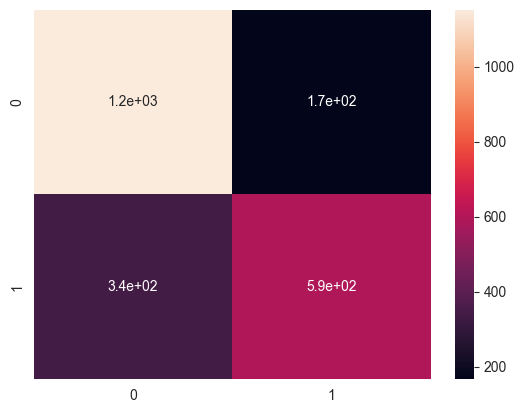

In [80]:
sv.fit(X_train_ , y_train)
y_pred = sv.predict(X_test_)

print(f'accuracy_score: {accuracy_score(y_test , y_pred)}')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 

accuracy_score: 0.7524444444444445
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1575
           1       0.56      0.78      0.65       675

    accuracy                           0.75      2250
   macro avg       0.72      0.76      0.73      2250
weighted avg       0.79      0.75      0.76      2250

[[1168  150]
 [ 407  525]]


<Axes: >

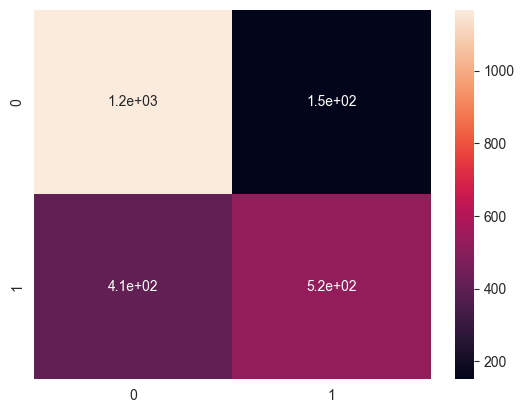

In [82]:
nb.fit(X_train_ , y_train)
y_pred = nb.predict(X_test_)

print(f'accuracy_score: {accuracy_score(y_test , y_pred)}')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 

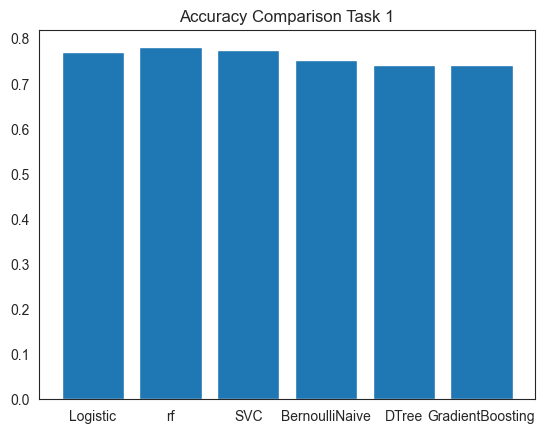

In [113]:
plt.bar(height=[0.77,0.78,0.775,0.7520 , 0.74, 0.74],x=['Logistic' , 'rf','SVC','BernoulliNaive' ,'DTree','GradientBoosting'])
plt.title('Accuracy Comparison Task 1')
plt.show()

In [83]:
from sklearn.multioutput import MultiOutputClassifier

In [95]:
X = data['cleaned']
y= data[['AG','TR']]

In [96]:
X_train, X_test , y_train , y_test = train_test_split(X,y)
X_train_ = tfidf.fit_transform(X_train)
X_test_ = tfidf.transform(X_test)

In [90]:
y_train

,AG,TR
3059,0,0
5782,0,1
4409,0,0
390,0,0
1659,0,0
...,...,...
775,0,0
1501,0,0
6733,0,0
5375,0,1


In [97]:

y_train = y_train.astype('int64')

In [98]:
y_train.dtypes

AG    int64
TR    int64
dtype: object

In [103]:
y_test = y_test.astype('int64')

In [104]:
classifier = MultiOutputClassifier(LogisticRegression())
classifier.fit(X_train_ , y_train)
y_pred = classifier.predict(X_test_)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy :- {accuracy}')


Accuracy :- 0.7511111111111111


In [105]:
classifier = MultiOutputClassifier(RandomForestClassifier())
classifier.fit(X_train_ , y_train)
y_pred = classifier.predict(X_test_)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy :- {accuracy}')


Accuracy :- 0.7591111111111111


In [106]:
classifier = MultiOutputClassifier(SVC())
classifier.fit(X_train_ , y_train)
y_pred = classifier.predict(X_test_)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy :- {accuracy}')


Accuracy :- 0.7542222222222222


In [107]:
classifier = MultiOutputClassifier(GradientBoostingClassifier())
classifier.fit(X_train_ , y_train)
y_pred = classifier.predict(X_test_)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy :- {accuracy}')

Accuracy :- 0.7591111111111111


In [108]:
classifier = MultiOutputClassifier(BernoulliNB())
classifier.fit(X_train_ , y_train)
y_pred = classifier.predict(X_test_)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy :- {accuracy}')

Accuracy :- 0.7297777777777777


In [109]:
classifier = MultiOutputClassifier(DecisionTreeClassifier())
classifier.fit(X_train_ , y_train)
y_pred = classifier.predict(X_test_)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy :- {accuracy}')

Accuracy :- 0.7004444444444444


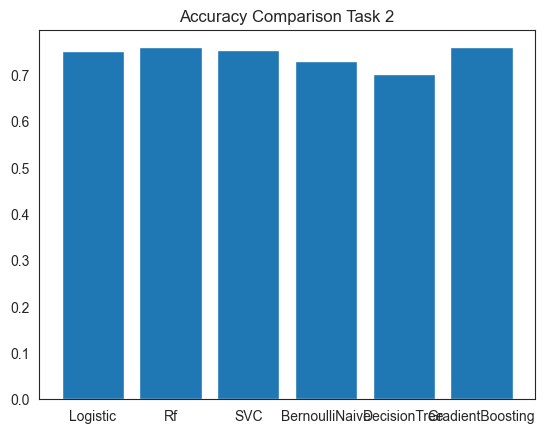

In [112]:
plt.bar(height=[0.7511111111111111,0.7591111111111111,0.7542222222222222,0.7297777777777777, 0.7004444444444444, 0.7591111111111111],x=['Logistic' , 'Rf','SVC','BernoulliNaive' ,'DecisionTree','GradientBoosting'])
plt.title('Accuracy Comparison Task 2')
plt.show()